I plot the heterozygosity (as a function of generation numbers) for three different models of neutral evolution (Wright-Fisher, Moran and random walk)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

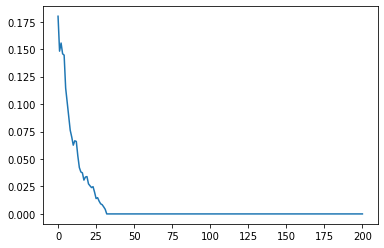

In [1]:
#Wright-Fisher

N = 10 #Number of individuals
t_steps = 200 #Number of generations
num_simulations = 100 #Number of simulations to run

#Array that contains number of individuals with allele a (initially 10% of population)
X = np.zeros ((t_steps + 1, num_simulations))
X[0] = 0.1*N

#Running Wright-Fisher
for j in range(num_simulations):
  for i in range (1, t_steps + 1):
    X[i, j] = np.random.binomial (N, X[i-1, j]/N)

#Computing heterozygosity
H = 2* (X/N) * (1-(X/N))

#Averaging over simulations
H = np.mean(H, axis = 1)


plt.plot (H)





In [2]:
#Moran model

def Moran_probabilities(X):
  p_1 = (X/N) ** 2 + (1-(X/N))**2 #P(X stays same)
  p_2 = 0.5 * 2 * (X/N)*(1-X/N) #P(X goes up or down)
  return [p_2, p_1, p_2]
  

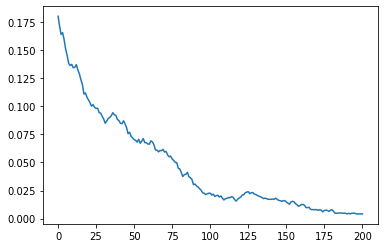

In [3]:
N = 10 #Number of individuals
t_steps = 200 #Number of generations
num_simulations = 100 #Number of simulations to run

#Array that contains number of individuals with allele a (initially 10% of population)
X = np.zeros ((t_steps + 1, num_simulations))
X[0] = 0.1*N


#Running Moran
for j in range(num_simulations):
  for i in range (1, t_steps + 1):
    X [i,j] = X[i-1,j] + np.random.choice(np.array([-1, 0, 1]), p = Moran_probabilities(X[i-1,j]))
    

#Computing heterozygosity
H = 2* (X/N) * (1-(X/N))

#Averaging over simulations
H = np.mean(H, axis = 1)


plt.plot (H)

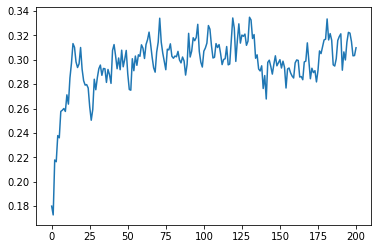

In [13]:
#Random walk model

N = 10 #Number of individuals
t_steps = 200 #Number of generations
num_simulations = 100 #Number of simulations to run

#Array that contains number of individuals with allele a (initially 10% of population)
X = np.zeros ((t_steps + 1, num_simulations))
X[0] = 0.1*N


#Running random walk
for j in range(num_simulations):
  for i in range (1, t_steps + 1):
    X [i,j] = X[i-1,j] + np.random.choice(np.array([-1, 1]), p = [0.5, 0.5])
    
    #Making sure X is not less than 0
    if X[i,j] < 0:
      X[i,j] = 0

    #Making sure X is not more than N
    if X[i,j] > N:
      X[i,j] = N


#Computing heterozygosity
H = 2* (X/N) * (1-(X/N))


#Averaging over simulations
H = np.mean(H, axis = 1)



plt.plot (H)
  